# Görüntüdeki nesneleri ayırt etmek için kullanılan algoritmalar 1 ye ayrılır
* 1) Sınır Tabanlı Algoritmalar
* 2) Alan Tabanlı Algoritmalar (Watershed burada)

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def display(img,cmap=None): 
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

### 1. Yaklaşım "Naive yaklaşımı" kullanacağım

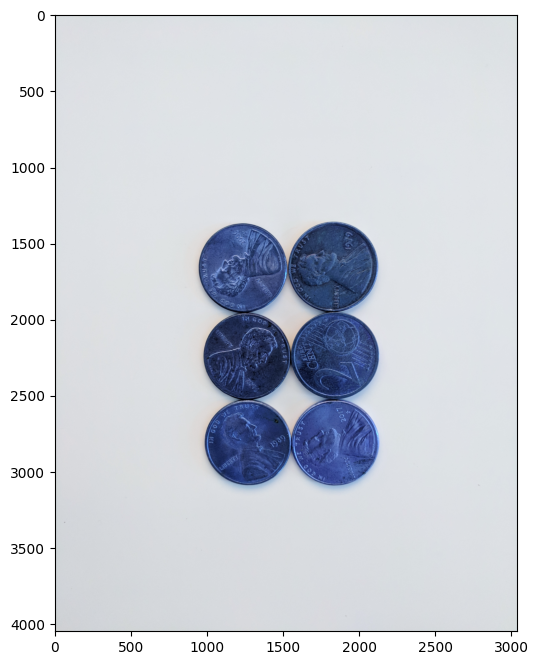

In [21]:
para= cv2.imread("input/coin.jpg")# bgr formatında
display(para)

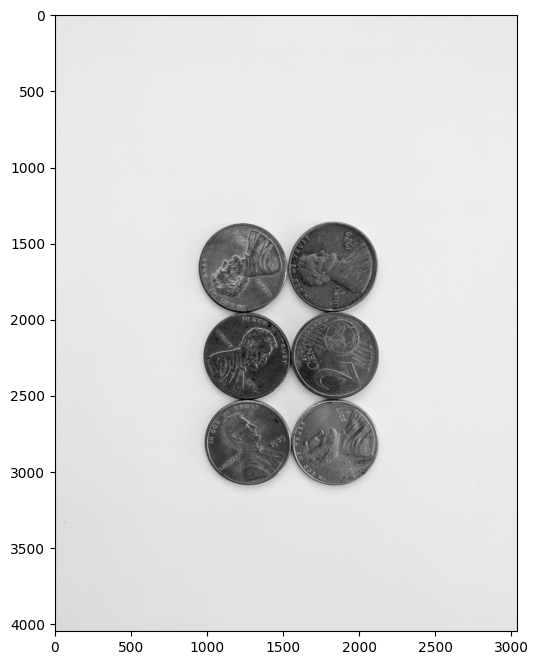

In [22]:
gri_para=cv2.cvtColor(para,cv2.COLOR_BGR2GRAY)
display(gri_para,cmap='gray')

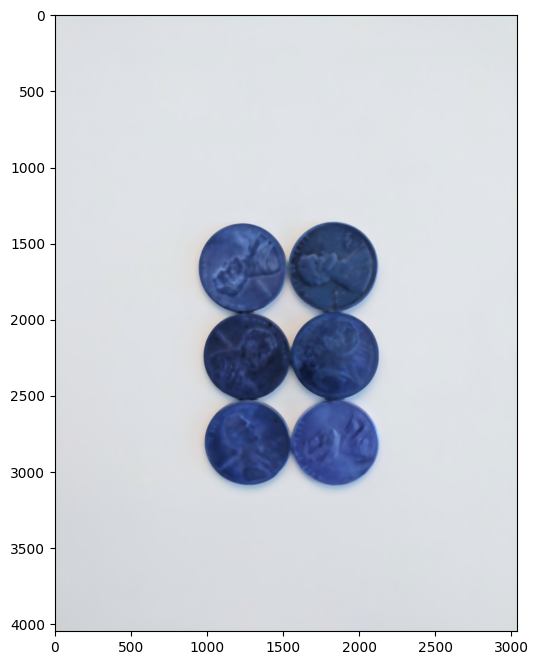

In [23]:
# ana fotoğrafıma bulur uygulayalım
sep_blur=cv2.medianBlur(para,ksize=25) # fotoğraftaki gürültü oranını filtre sayesinde azaltıyoruz
display(sep_blur)

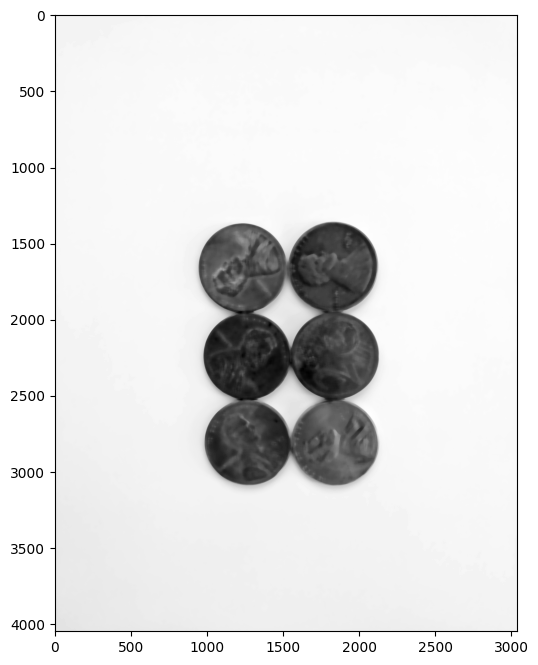

In [24]:
# blurlu fotoğrafımı gri formata çeviriyorum
gray_sep_coins=cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins,cmap="gray")

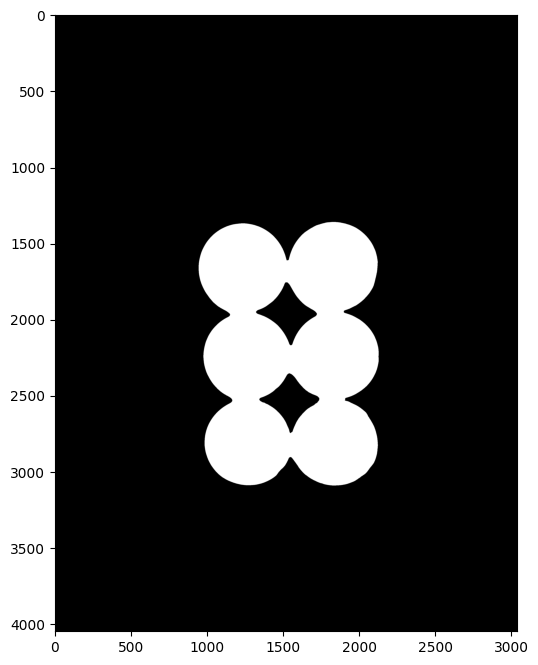

In [25]:
# bayneryThreshold ile paraları beyaz etrafını siyah göstereceğim
ret,sep_thresh=cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)
display(sep_thresh,cmap="gray")

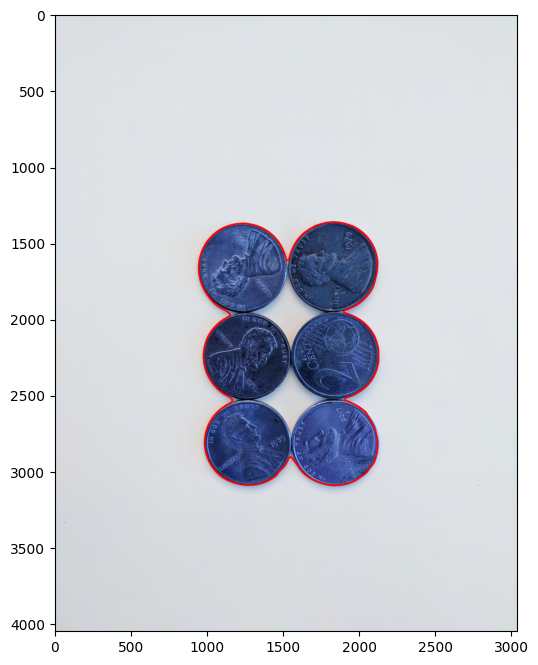

In [26]:
# contours ları bulup paraların etrafını çizicez
contours,hierarchy=cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(para,contours,i,(255,0,0),10)
display(para)

### ! Görüldüğü üzere içeriyi çizmedi işte bu noktada eatershed algoritması devreye giriyor

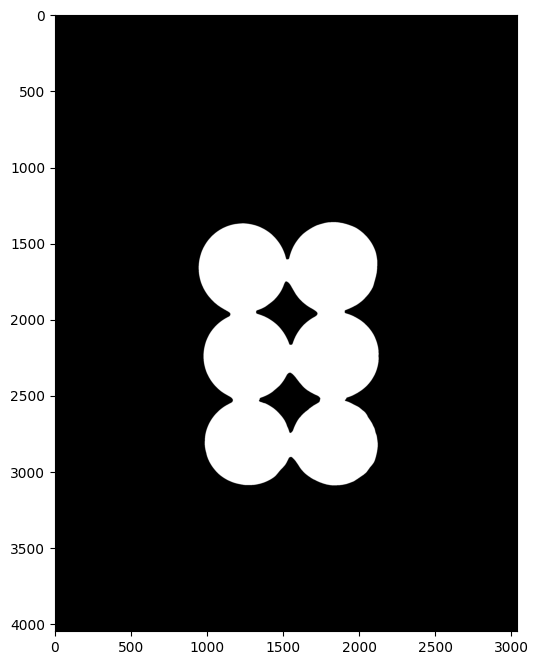

In [27]:
img=cv2.imread("input/coin.jpg")
img=cv2.medianBlur(img,ksize=35) # ! ksize 35 yerine 25 vermiştim o zmn sol üstteki ve sağ alttakini görmemişti ileriki projelerde bu değer üzerinde de oynarız
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh,cmap="gray")

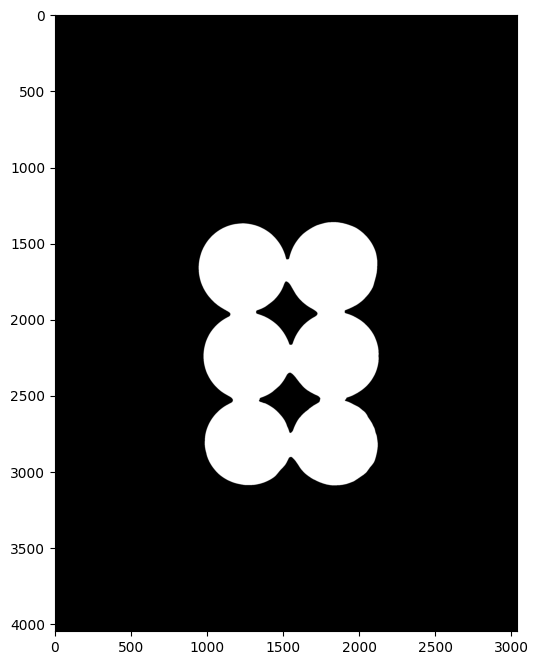

In [28]:
# biraz daha gürültü azaltacağım
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2) # morphological transform adı altında geçiyor diğerlerini hatırlamak için bu şekilde araştırabilrsin
display(opening,cmap="gray")

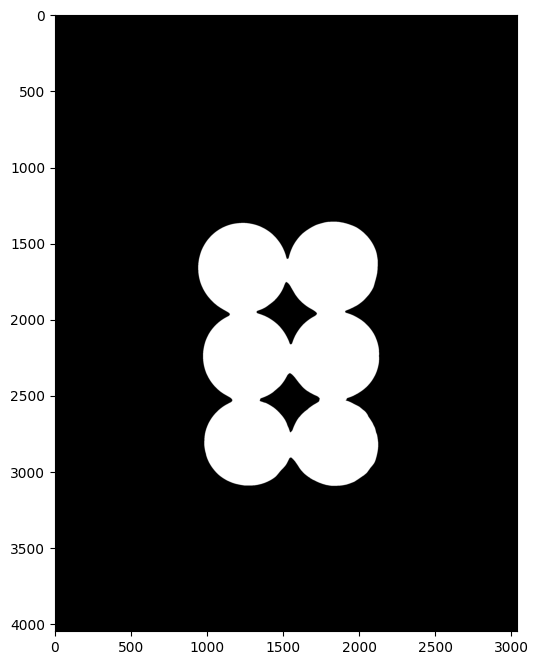

In [29]:
# dilate uygulayacağız
sure_bg=cv2.dilate(opening,kernel,iterations=3)
display(sure_bg,cmap="gray")

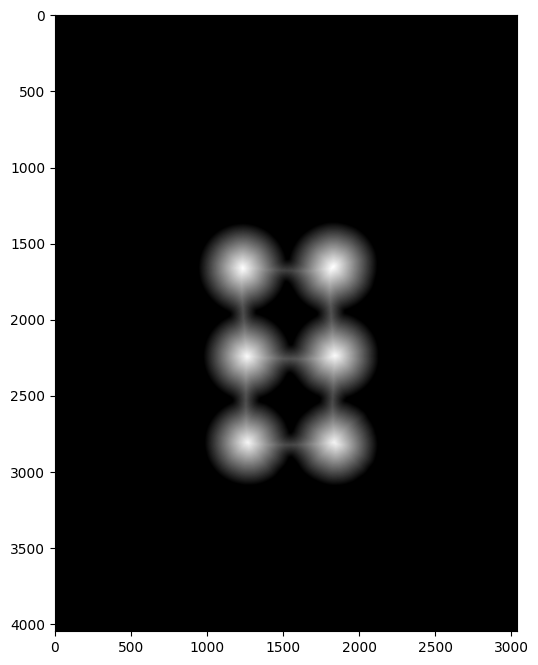

In [30]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(dist_transform,cmap="gray")

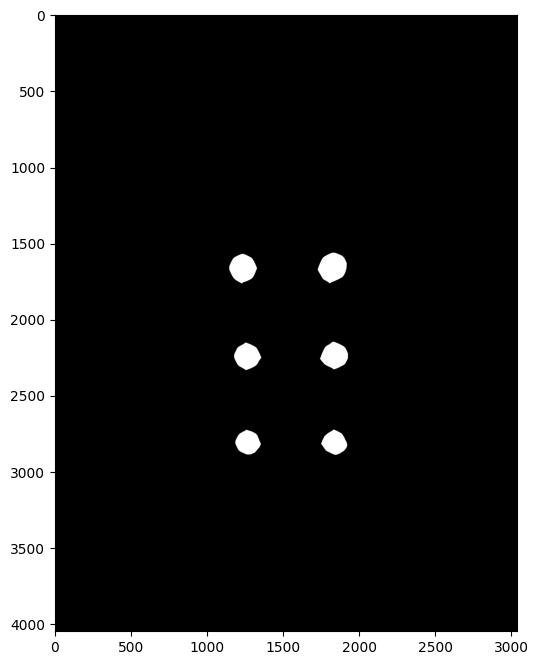

In [31]:
display(sure_fg,cmap="gray")

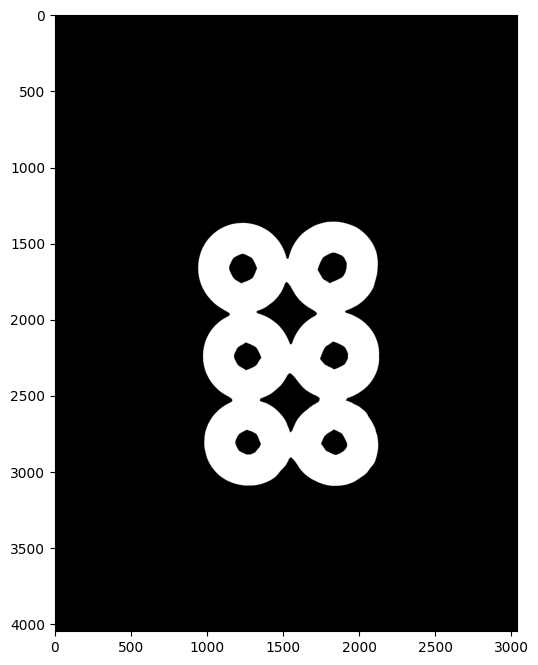

In [33]:
# fotoğraflara birbirini ekleyeceğim
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)
display(unknown,cmap="gray")

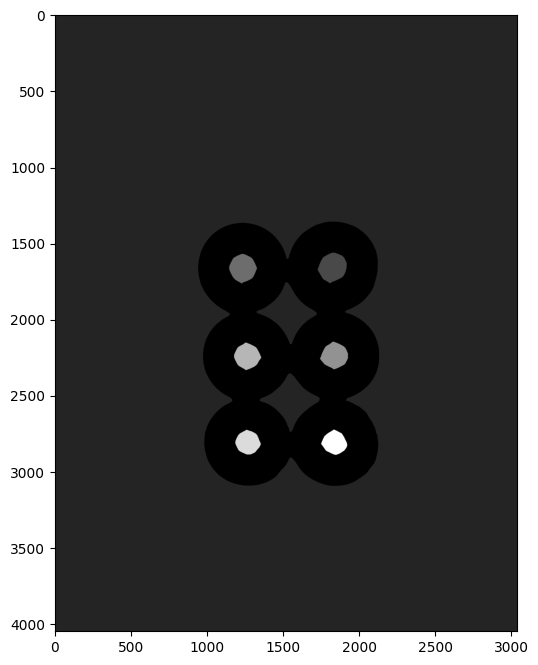

In [35]:
# yaptığımız aşamalar sonucunda 2li görüntüler elde ettik ve şimdi bunların sayısını öğreneceğiz
ret,markers=cv2.connectedComponents(sure_fg)
markers=markers+1 # markers sıfırdan başlıyorlarmış bu yüzden 1 ekledik   
markers[unknown==255]=0
display(markers,cmap="gray")
# bu bizim katmanları birbirinden ayırma işlemimizi kolaylaştırmış oldu

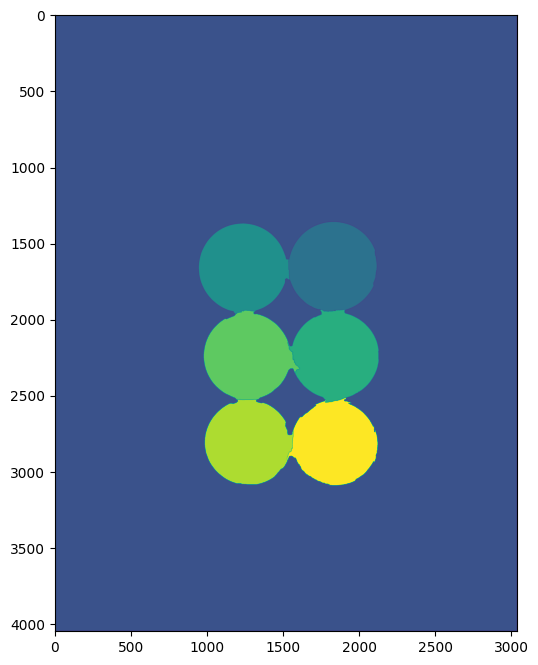

In [36]:
markers=cv2.watershed(img,markers)
display(markers) # gördüğün gibi her madeni para farklı renkte

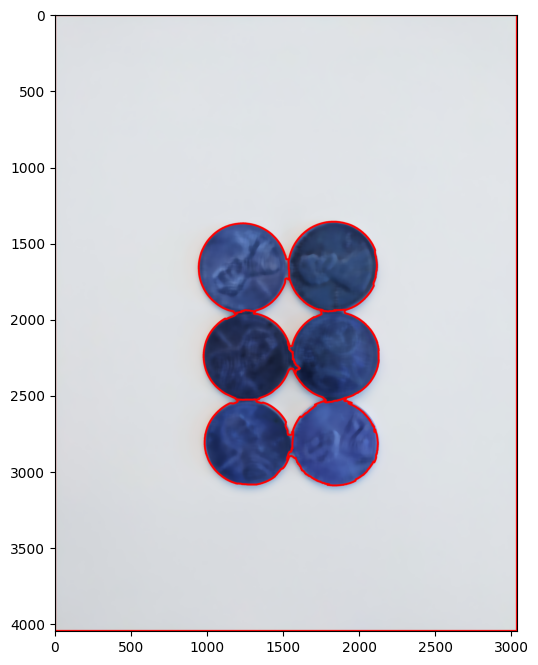

In [37]:
# şimdi çizelim
contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(img,contours,i,(255,0,0),10)
display(img)